In [14]:
from enum import Enum
from pathlib import Path
import numpy as np
import h5py
import sys 
sys.path.append('../')

from source.helper import to_dB, print_spectogram, gen_spectogram, diff_frames, \
                          get_argmaxed_spectrogram, get_tresholded_spectogram,  \
                          get_spectrogram_metrics, plot_metrics, get_spectogram_slices


class SampleType(Enum):
    DEAD = 0
    LIVE = 1

In [15]:
BASE_DIR = Path("D:/SIIUM/3 semestr/RADAR/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r') # best to make yourself a h5 file containing complete dataset

In [16]:
data_keys =list(loaded_file['2023_03_21'].keys())

data_keys = [k for k in data_keys if k not in ['bartek_sciana', 'wiatrak_2m_bartek_sciana']]

dict_classes = {'background': SampleType.DEAD, 
           'bartek_sciana': SampleType.DEAD,  
           'biegunko_1os_2m_rafal': SampleType.LIVE, 
           'chodzonko_1os_2m_bartek': SampleType.LIVE,  
           'chodzonko_1os_4-1-8m_bartek': SampleType.LIVE, 
           'chodzonko_2os_2m_bartek_3m_oskar': SampleType.LIVE,  
           'chodzonko_2os_2m_oskar_3m_bartek': SampleType.LIVE, 
           'odleglosc_1m_bartek_bokiem': SampleType.LIVE, 
           'odleglosc_1m_bartek_przodem': SampleType.LIVE, 
           'odleglosc_2m_bartek_bokiem': SampleType.LIVE, 
           'odleglosc_2m_bartek_przodem': SampleType.LIVE, 
           'odleglosc_3m_bartek_bokiem': SampleType.LIVE, 
           'odleglosc_3m_bartek_przodem': SampleType.LIVE, 
           'odleglosc_4m_bartek_bokiem': SampleType.LIVE, 
           'odleglosc_4m_bartek_przodem': SampleType.LIVE, 
           'randomowe_chodzonko_1os_bartek' : SampleType.LIVE, 
           'randomowe_chodzonko_3os': SampleType.LIVE, 
           'wiatrak_1m': SampleType.DEAD, 
           'wiatrak_2m': SampleType.DEAD, 
           'wiatrak_2m_bartek_sciana': SampleType.DEAD, 
           'wiatrak_3m': SampleType.DEAD,  
           'wiatrak_4m': SampleType.DEAD,  
           'wysoki_niski_3m_oskar_bartek_przodem': SampleType.LIVE, 
}


In [17]:
slices_list = []
slices_labels = []
for key in data_keys:
    print(key, dict_classes[key])
    sample_file = loaded_file['2023_03_21'][key]
    sample_file = sample_file[:, 0, 0, :]
    frames_diff = diff_frames(sample_file, 1)  #odejmujemy ostatnią klatkę
    diff_spect, y = gen_spectogram(frames_diff, depth_limit=8)
    diff_spectdb = to_dB(diff_spect)
    argmax_spectrogram = get_argmaxed_spectrogram(diff_spectdb) # this returns spectrogram with 1 at argmax, else 0
    class_id = dict_classes[key].value
    slices = get_spectogram_slices(argmax_spectrogram)
    labels = np.full(slices.shape[0], class_id)
    
    slices_labels.append(labels)
    slices_list.append(slices)

labels = np.concatenate(slices_labels, axis=0)
con = np.concatenate(slices_list, axis=0)
    

background SampleType.DEAD
biegunko_1os_2m_rafal SampleType.LIVE
chodzonko_1os_2m_bartek SampleType.LIVE
chodzonko_1os_4-1-8m_bartek SampleType.LIVE
chodzonko_2os_2m_bartek_3m_oskar SampleType.LIVE
chodzonko_2os_2m_oskar_3m_bartek SampleType.LIVE
odleglosc_1m_bartek_bokiem SampleType.LIVE
odleglosc_1m_bartek_przodem SampleType.LIVE
odleglosc_2m_bartek_bokiem SampleType.LIVE
odleglosc_2m_bartek_przodem SampleType.LIVE
odleglosc_3m_bartek_bokiem SampleType.LIVE
odleglosc_3m_bartek_przodem SampleType.LIVE
odleglosc_4m_bartek_bokiem SampleType.LIVE
odleglosc_4m_bartek_przodem SampleType.LIVE
randomowe_chodzonko_1os_bartek SampleType.LIVE


d:\SIIUM\3 semestr\RADAR\radar-project\notebooks\..\source\helper.py:35: RuntimeWarning: divide by zero encountered in log
  return 20 * np.log(np.abs(spectogram))


randomowe_chodzonko_3os SampleType.LIVE
wiatrak_1m SampleType.DEAD
wiatrak_2m SampleType.DEAD
wiatrak_3m SampleType.DEAD
wiatrak_4m SampleType.DEAD
wysoki_niski_3m_oskar_bartek_przodem SampleType.LIVE


In [24]:
import pickle
with open('data_slices2.pickle', 'wb') as f:
    pickle.dump((con, labels), f)

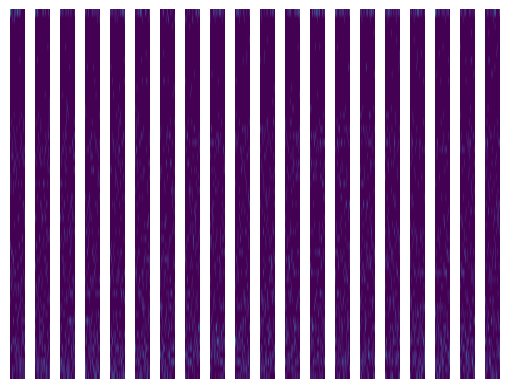

In [8]:
import pickle

import matplotlib.pyplot as plt
with open('../data/data_slices2.pickle', 'rb') as f:
    con2, labels2 = pickle.load(f)

fig, axs = plt.subplots(1, 20)

for x in range(20):
    axs[x].imshow(con2[x], aspect=100)
    axs[x].axis('off')
plt.show()

In [33]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([ 626, 2302], dtype=int64))

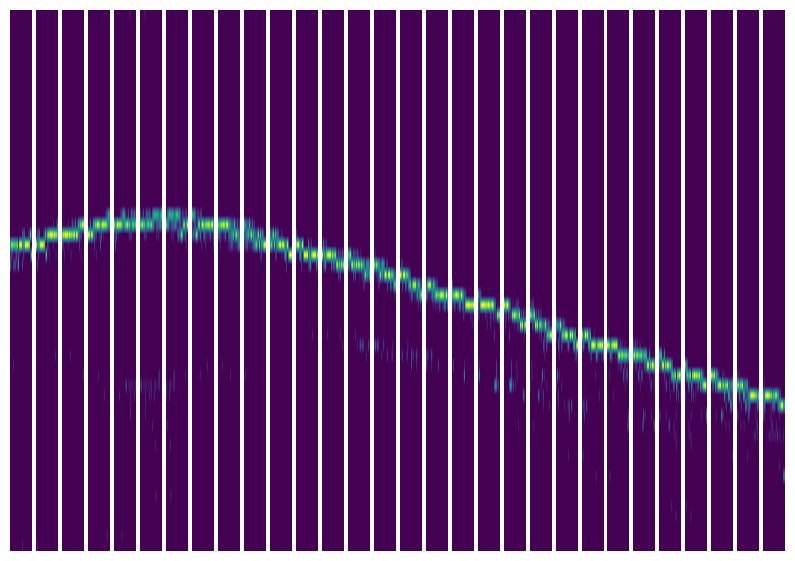

In [31]:
fig, axs = plt.subplots(1, 30, figsize=(10,10))

for x in range(30):
    axs[x].imshow(con2[1800 + x], aspect=100)
    axs[x].axis('off')
plt.show()

In [35]:
626/sum

0.21379781420765026